#Trabalho Prático - Processamento Linguagem Natural

Nome: Marco Aurélio Soares Abrantes \\
Matrícula: 98887

# 1) Acesse a base de dados disponibilizada


In [ ]:
# corpus 1
import requests
req = requests.get("https://raw.githubusercontent.com/juliosoaresreis/NLP/main/data/biblia.txt")
url_content = req.content
arquivo = open("biblia.txt", "wb")
arquivo.write(url_content)
arquivo.close()
!ls

biblia.txt  sample_data


#2) Analise a base de dados e plote os unigramas e bigramas mais comuns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of lines used: 32359

rebuilding corpus...
['gênesis']
GÊNESIS
 GÊNESIS 1
1 No princípio criou Deus os céus e a terra.

Tokenizando...
************************
Numero de linhas: 32359
Numero de palavras 743047
Tamanho vocabulario: 25932
-------------------------------------
=========== Unigramas ================
-------------------------------------
**************************************
computando a distribuicao de frequencia para todos os bigrams no texto
Numero: 743047


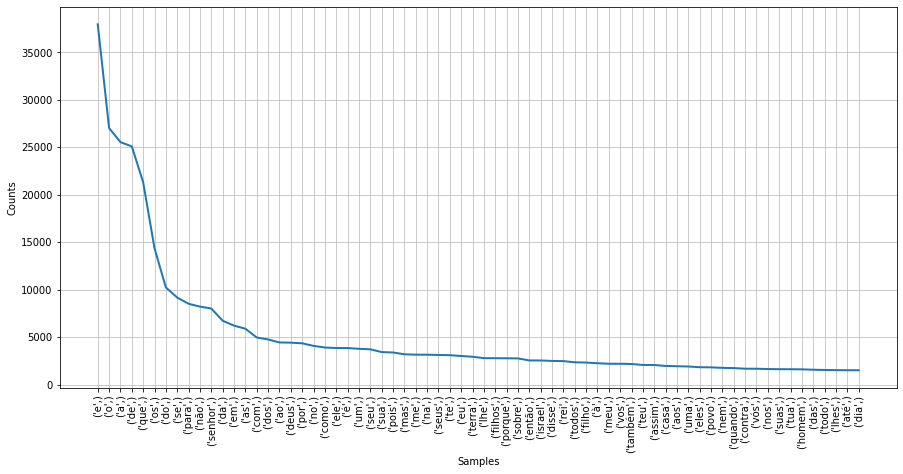

-------------------------------------
=========== Bigramas ================
-------------------------------------
**************************************
computando a distribuicao de frequencia para todos os bigrams no texto
Numero: 743046


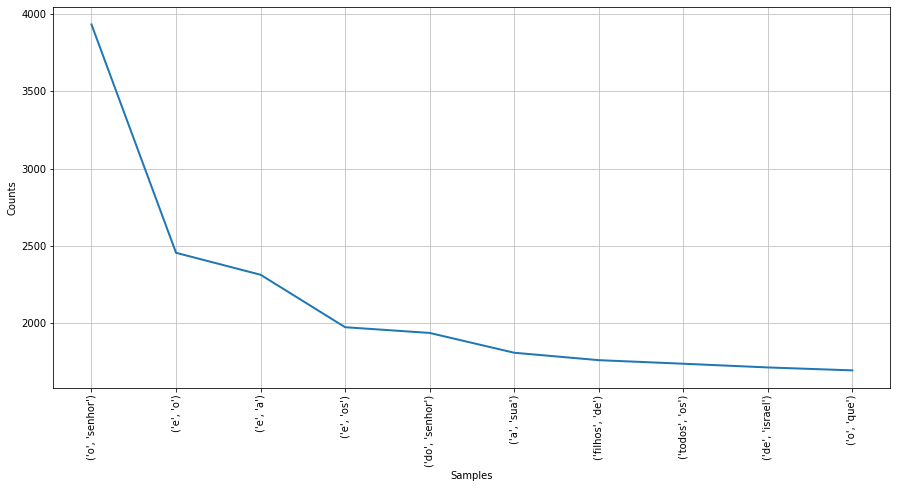

In [ ]:
# corpus 1

import time 
import operator
from matplotlib import pyplot
from nltk.text import Text
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.util import ngrams
from numpy import array
import numpy as np
from numpy import zeros
from numpy import asarray
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import RegexpTokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
import nltk


tempo = time.time()
nltk.download('punkt')

#Parameters
PERCENTAGE = 100       # Percentage of the corpus that will be used

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='UTF-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# split a loaded document into sentences
def to_lines(doc, percentage):
  lines = doc.strip().split('\n')
  n = int(len(lines)*percentage/100)
  print('Number of lines used:',n)
  if lines[n-1]=="":
    return lines[:n-1]
  return lines

#loading the corpus 
filename = 'biblia.txt'
doc = load_doc(filename)
corpus = to_lines(doc,PERCENTAGE)
sentences=[]

print('\nrebuilding corpus...')
for linha in corpus:
  tokens = text_to_word_sequence(linha)
  sentences.append(tokens)

print(sentences[0])

for l in corpus[:3]:
   print(l)
    
palavras=[]

print ("\nTokenizando...")
palavras = text_to_word_sequence(doc)
vocab = sorted(set(palavras))
vocab_size = len(vocab)

tokenizer = Tokenizer(lower=True, split=' ') 
tokenizer.fit_on_texts(doc)
sequences = tokenizer.texts_to_sequences(doc)
print("************************") 
print('Numero de linhas:',len(corpus))
print('Numero de palavras',len(palavras))
print('Tamanho vocabulario:',vocab_size)


print("-------------------------------------") 
print("=========== Unigramas ================")
print("-------------------------------------")

n = 1
bgs = ngrams(palavras, n)

print("**************************************")
print("computando a distribuicao de frequencia para todos os bigrams no texto")
fdist = nltk.FreqDist(bgs)

print ("Numero:",fdist.N())

num = len([a for a in fdist if fdist[a]>(1500)])

pyplot.figure(figsize=(15, 7))
fdist.plot(num)

print("-------------------------------------") 
print("=========== Bigramas ================")
print("-------------------------------------")

n = 2
bgs = ngrams(palavras, n)

print("**************************************")
print("computando a distribuicao de frequencia para todos os bigrams no texto")
fdist = nltk.FreqDist(bgs)

print ("Numero:",fdist.N())

num = len([a for a in fdist if fdist[a]>(1500)])

pyplot.figure(figsize=(15, 7))
fdist.plot(num)


#seu codigo

# 3) Faça uma vetorização com Word2vec ou FastText – vetor de 64 **posições**

In [ ]:
# corpus 1

print("-------------------------------------") 
print("=========== Vetorização ================")
print("-------------------------------------")

import os
import pandas as pd
import nltk
import gensim
import numpy as np
import codecs
import itertools
import time
import random

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from gensim import corpora, models, similarities
from nltk.probability import *

from sklearn.decomposition import PCA
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding

from numpy import asarray
from numpy import zeros

tempo = time.time()

print ("Word2vec...")

vector_size = 64

model = gensim.models.Word2Vec([palavras], min_count=1,window=5,  size=vector_size)

teste = "jesus"

print("------------Vetor Word2vec-------------")
print("palavra:", teste)
print(model.wv[teste])

-------------------------------------
=========== Vetorização ================
-------------------------------------
Word2vec...
------------Vetor Word2vec-------------
palavra: jesus
[-3.4518316e-03  6.4580604e-03  4.6635116e-03  2.7376518e-04
  7.2409841e-04  6.6415414e-05 -4.0537156e-03  5.7726842e-03
  2.5190031e-03  5.1114922e-03 -5.2764975e-03  6.5722656e-03
 -1.3801297e-04  3.2158524e-03 -1.9970874e-03  7.6416903e-03
  5.7555824e-03  2.4339240e-03 -1.9848652e-03  5.7591172e-03
 -4.5462707e-03  4.6699564e-03 -6.4049195e-03 -7.4768970e-03
 -3.0729014e-03  4.6346383e-04  6.3425996e-03 -5.8947026e-04
  5.7588350e-03 -5.4921359e-03 -6.1223716e-03 -6.4827055e-03
 -5.7761543e-03 -7.2192177e-03 -5.2544656e-03  2.4965503e-03
 -5.1353490e-03 -8.9226458e-05  1.0899213e-03  1.3501912e-03
 -4.5565665e-03 -4.9388194e-03 -5.3234417e-03 -4.9961316e-03
 -3.1032974e-03 -1.3654457e-03  5.4137921e-03  7.7993250e-03
  5.7531064e-03 -9.6819928e-04 -5.1092883e-03 -6.1331820e-03
 -4.6843668e-03 -5.2471

# 4) Selecione 10 palavras e para cada uma delas faça uma lista de 5 palavras mais similares

In [ ]:
# corpus 1

print("-----------------------------------------------") 
print("=========== Palavras Similares ================")
print("-----------------------------------------------")

# fit a 2d PCA model to the vectors
semantically_similar_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
  for words in ['senhor', 'israel', 'filhos', 'céu', 'terra', 'abraão', 'jesus', 'demônio', 'maria', 'judas']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

-----------------------------------------------
=========== Palavras Similares ================
-----------------------------------------------
senhor:['abraão', 'lhe', 'a', 'e', 'de']
israel:['ajuntareis', 'selomite', 'libertinagem', 'efrata', 'espanha']
filhos:['e', 'que', 'a', 'abraão', 'disse']
céu:['e', 'meu', 'de', 'que', 'lhe']
terra:['e', 'a', 'abraão', 'o', 'que']
abraão:['e', 'a', 'o', 'que', 'lhe']
jesus:['percorrerei', 'contaste', 'esboça', 'fartura', 'vivificar']
demônio:['afirmo', 'soberbíssima', 'firmado', 'meninos', 'comprarem']
maria:['rissa', 'enredado', 'derdes', 'moído', 'escapos']
judas:['netofatitas', 'amargurados', 'renderia', 'entraremos', 'ázimos']


# 5) Análise e Plote PCA

-----------------------------------------------
=========== Análise e Plote PCA ===============
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

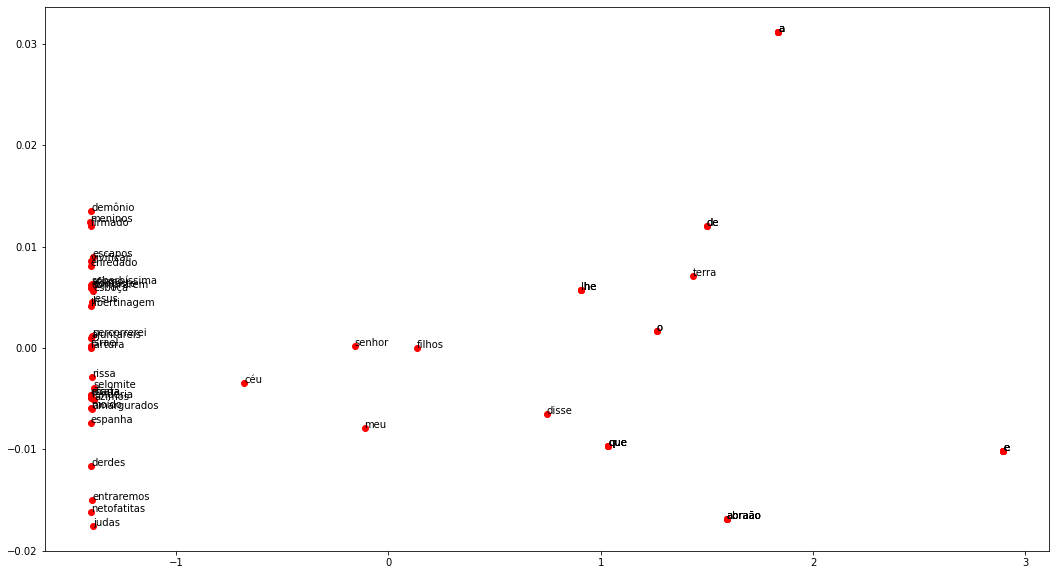

In [ ]:
# corpus 1

print("-----------------------------------------------") 
print("=========== Análise e Plote PCA ===============")
print("-----------------------------------------------")

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

word_vectors = model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words
pyplot.clf()
pyplot.figure(figsize=(18, 10))
pyplot.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    pyplot.annotate(word_names, xy=(x, y), xytext=(0, 0), textcoords='offset points')